In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('adult_data.csv')

In [ ]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','realtionship','race','sex','capital_gain','capital_loss','hour_per_week','country','target']

In [ ]:
df_copy = df

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,realtionship,race,sex,capital_gain,capital_loss,hour_per_week,country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   realtionship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hour_per_week   32560 non-null  int64 
 13  country         32560 non-null  object
 14  target          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hour_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Text(0.5, 1.0, 'Age Distribution')

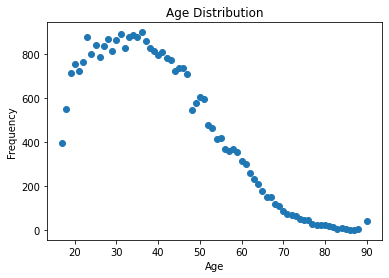

In [ ]:
plt.scatter(df.age.value_counts().index,df.age.value_counts())
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

In [ ]:
df.age.value_counts().index

Int64Index([36, 31, 34, 23, 35, 33, 28, 30, 37, 25, 27, 32, 38, 39, 29, 41, 24,
            40, 26, 42, 43, 22, 20, 46, 45, 44, 21, 19, 47, 50, 51, 49, 18, 48,
            52, 53, 55, 54, 17, 56, 58, 57, 59, 60, 61, 62, 63, 64, 65, 67, 66,
            68, 69, 70, 71, 72, 73, 74, 76, 75, 90, 77, 78, 79, 80, 81, 82, 84,
            83, 88, 85, 86, 87],
           dtype='int64')

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'realtionship', 'race', 'sex', 'country', 'target'],
      dtype='object')

In [ ]:
for i in df.select_dtypes(include=['object']).columns:
  print(f'\n Columns data checking : {i}\n',df[i].value_counts().index)


 Columns data checking : workclass
 Index([' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype='object')

 Columns data checking : education
 Index([' HS-grad', ' Some-college', ' Bachelors', ' Masters', ' Assoc-voc',
       ' 11th', ' Assoc-acdm', ' 10th', ' 7th-8th', ' Prof-school', ' 9th',
       ' 12th', ' Doctorate', ' 5th-6th', ' 1st-4th', ' Preschool'],
      dtype='object')

 Columns data checking : marital_status
 Index([' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype='object')

 Columns data checking : occupation
 Index([' Prof-specialty', ' Craft-repair', ' Exec-managerial', ' Adm-clerical',
       ' Sales', ' Other-service', ' Machine-op-inspct', ' ?',
       ' Transport-moving', ' Handlers-cleaners', ' Farming-fishing',
       ' Tech-support', ' Protective-serv', ' Priv-hous

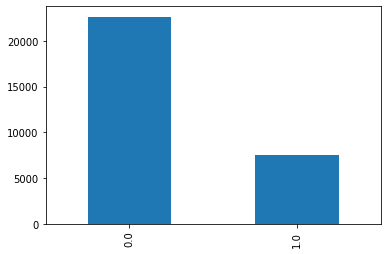

In [ ]:
df.target.value_counts().plot(kind='bar')

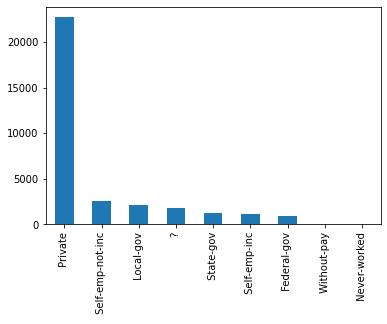

In [ ]:
df.workclass.value_counts().plot(kind='bar')

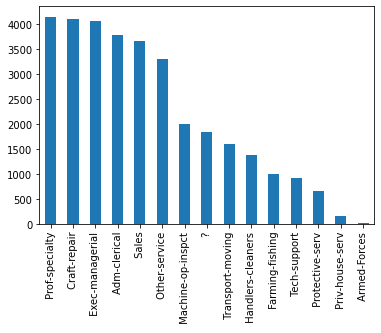

In [ ]:
df.occupation.value_counts().plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

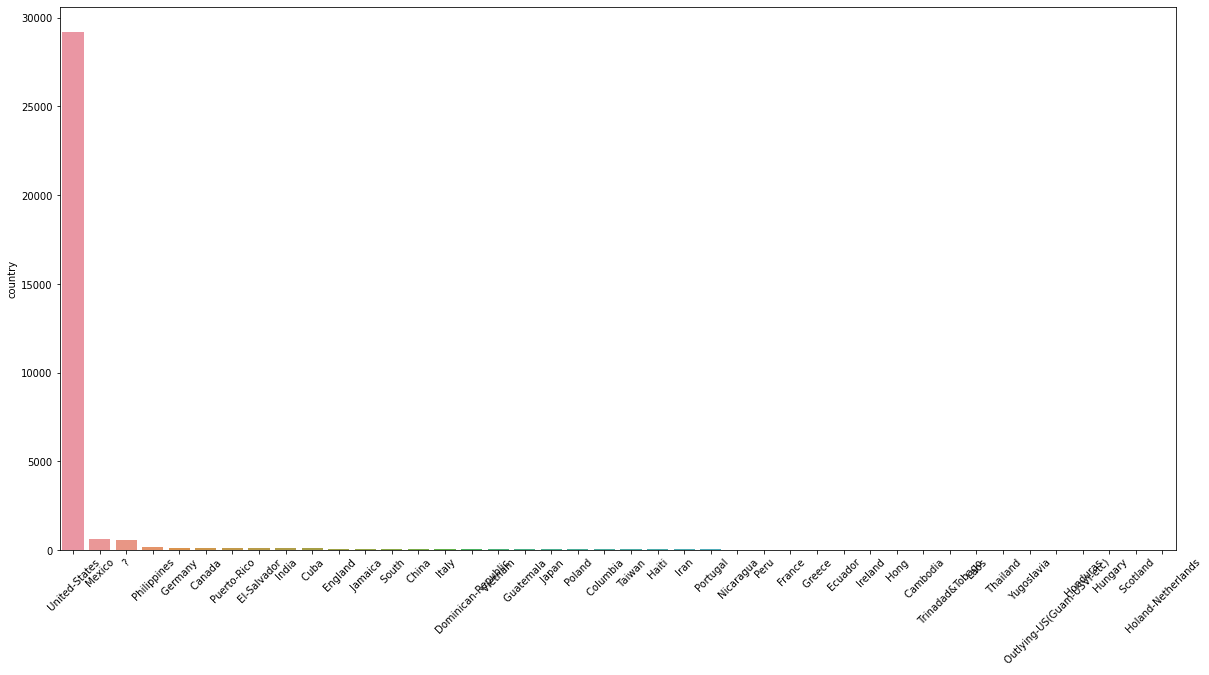

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=df.country.value_counts().index,y=df.country.value_counts(),data = df)
plt.xticks(rotation=45)

In [ ]:
df.replace({" ?":np.nan},inplace=True)

In [ ]:
df.shape

(32560, 15)

In [ ]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
realtionship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hour_per_week        0
country            583
target               0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
realtionship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hour_per_week     0
country           0
target            0
dtype: int64

In [ ]:
df.shape

(30161, 15)

In [ ]:
df.duplicated().sum()

23

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(30138, 15)

In [ ]:
catcol = df.select_dtypes(include=['object']).columns

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[catcol] = oe.fit_transform(df[catcol])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
type(catcol)

pandas.core.indexes.base.Index

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,realtionship,race,sex,capital_gain,capital_loss,hour_per_week,country,target
0,50,4.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
1,38,2.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
2,53,2.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
3,28,2.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0
4,37,2.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0.0


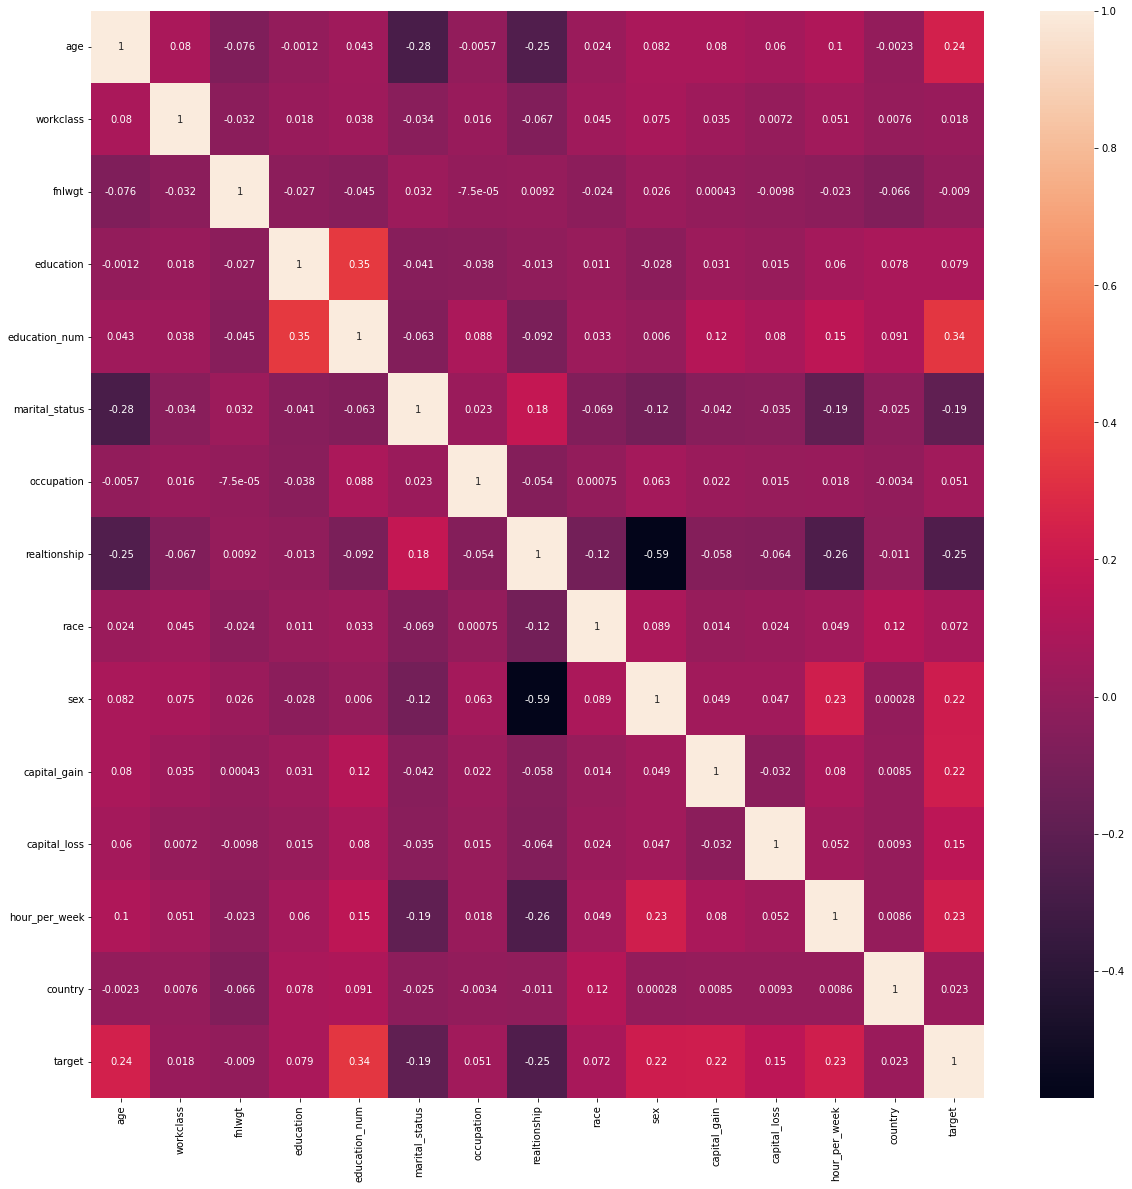

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#df = df.drop(['fnlwgt','race','occupation','education','workclass','capital_loss'],axis=1)

In [ ]:
df.shape

(30138, 15)

In [ ]:
y = df.target
X = df.drop(['target'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train_sc = scaler.transform(X_train)
X_test_sc  = scaler.transform(X_test)

In [ ]:
# Applying LDA function on training
# and testing set of X component
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train_sc = lda.fit_transform(X_train_sc, y_train)
X_test_sc = lda.transform(X_test_sc)

In [ ]:
X_test_sc.shape

(7535, 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(random_state = 47)
logreg.fit(X_train_sc, y_train)

LogisticRegression(random_state=47)

In [ ]:
y_pred = logreg.predict(X_test_sc)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_sc, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix1)

[[5276  389]
 [ 996  874]]


In [ ]:
trainy_pred = logreg.predict(X_train_sc)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_train_sc, y_train)))

cm1 = confusion_matrix(y_train, trainy_pred)
print("\n",cm1)

print("\n",classification_report(y_train,trainy_pred))

Accuracy of logistic regression classifier on test set: 0.81

 [[15801  1166]
 [ 3118  2518]]

               precision    recall  f1-score   support

         0.0       0.84      0.93      0.88     16967
         1.0       0.68      0.45      0.54      5636

    accuracy                           0.81     22603
   macro avg       0.76      0.69      0.71     22603
weighted avg       0.80      0.81      0.80     22603



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      5665
         1.0       0.69      0.47      0.56      1870

    accuracy                           0.82      7535
   macro avg       0.77      0.70      0.72      7535
weighted avg       0.80      0.82      0.80      7535



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state = 47,max_depth=10)
dec_tree.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=10, random_state=47)

In [ ]:
y_pred2 = dec_tree.predict(X_test_sc)
print('Accuracy of Decision Tree Classifier classifier on test set: {:.2f}'.format(dec_tree.score(X_test_sc, y_test)))

Accuracy of Decision Tree Classifier classifier on test set: 0.81


In [ ]:
confusion_matrix2 = confusion_matrix(y_test, y_pred2)
print(confusion_matrix2)

[[5168  497]
 [ 947  923]]


In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      5665
         1.0       0.65      0.49      0.56      1870

    accuracy                           0.81      7535
   macro avg       0.75      0.70      0.72      7535
weighted avg       0.80      0.81      0.80      7535



In [ ]:
trainy_pred2 = dec_tree.predict(X_train_sc)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dec_tree.score(X_train_sc, y_train)))

cm2 = confusion_matrix(y_train, trainy_pred2)
print("\n",cm2)

print("\n",classification_report(y_train,trainy_pred2))

Accuracy of Decision Tree classifier on test set: 0.82

 [[15672  1295]
 [ 2696  2940]]

               precision    recall  f1-score   support

         0.0       0.85      0.92      0.89     16967
         1.0       0.69      0.52      0.60      5636

    accuracy                           0.82     22603
   macro avg       0.77      0.72      0.74     22603
weighted avg       0.81      0.82      0.81     22603

